## Campaña de Marketing Bancario: EDA + Modelo de Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib

In [2]:

from lazypredict.Supervised import LazyClassifier

### Exploración preliminar de los datos

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', delimiter=';')
pd.set_option('display.max_columns', None)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.nunique() 

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [7]:
df.duplicated().sum()

12

In [8]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [9]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes


In [10]:
# Separamos en variables numéricas y categóricas
categorical_cols = ['job', 'marital','education', 'default','housing','loan', 'contact', 'month','day_of_week', 'poutcome', 'y']
df_cat = df[categorical_cols]


In [11]:
df_num = df.drop(df[categorical_cols], axis = 1)

*Conclusiones Exploración Preliminar*:

- *Forma:  21 columnas y 41188 filas en teoría sin valores faltantes. Todas las variables tienen más de un valor único.*
- *Variables: 11 categóricas y 10 numéricas.*
- *Target: Binaria, el cliente contrata un depósito a largo plazo o no ("y").*
- *Había 12 filas duplicadas de las que hemos prescindido.*

### Análisis univariante: variables numéricas

In [12]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.00,40.02,10.42,17.00,32.00,38.00,47.00,98.00
duration,41176.00,258.32,259.31,0.00,102.00,180.00,319.00,4918.00
campaign,41176.00,2.57,2.77,1.00,1.00,2.00,3.00,56.00
pdays,41176.00,962.46,186.94,0.00,999.00,999.00,999.00,999.00
previous,41176.00,0.17,0.49,0.00,0.00,0.00,0.00,7.00
emp.var.rate,41176.00,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cons.price.idx,41176.00,93.58,0.58,92.20,93.08,93.75,93.99,94.77
cons.conf.idx,41176.00,-40.50,4.63,-50.80,-42.70,-41.80,-36.40,-26.90
euribor3m,41176.00,3.62,1.73,0.63,1.34,4.86,4.96,5.04
nr.employed,41176.00,5167.03,72.25,4963.60,5099.10,5191.00,5228.10,5228.10


*Primeras deducciones:*

- *Edad: media de 40 años, gran mayoría entre los 30 y los 50.*
- *Duración contacto en segundos: en algunas filas la duración es 0, por lo tanto, en estos casos no cogieron el teléfono o no se les llamó.*
- *Pdays: la mayoría valores cercanos a 1000.*
- *Campaign: Entre 1-3 contactos mayoritariamente.*
- *Previous: 0 la mayoría*

In [13]:
# Explorando las filas en los que existen valores 0

print((df['duration'] == 0).sum())
print((df['pdays'] == 0).sum())
print((df['previous'] == 0).sum())

4
15
35551


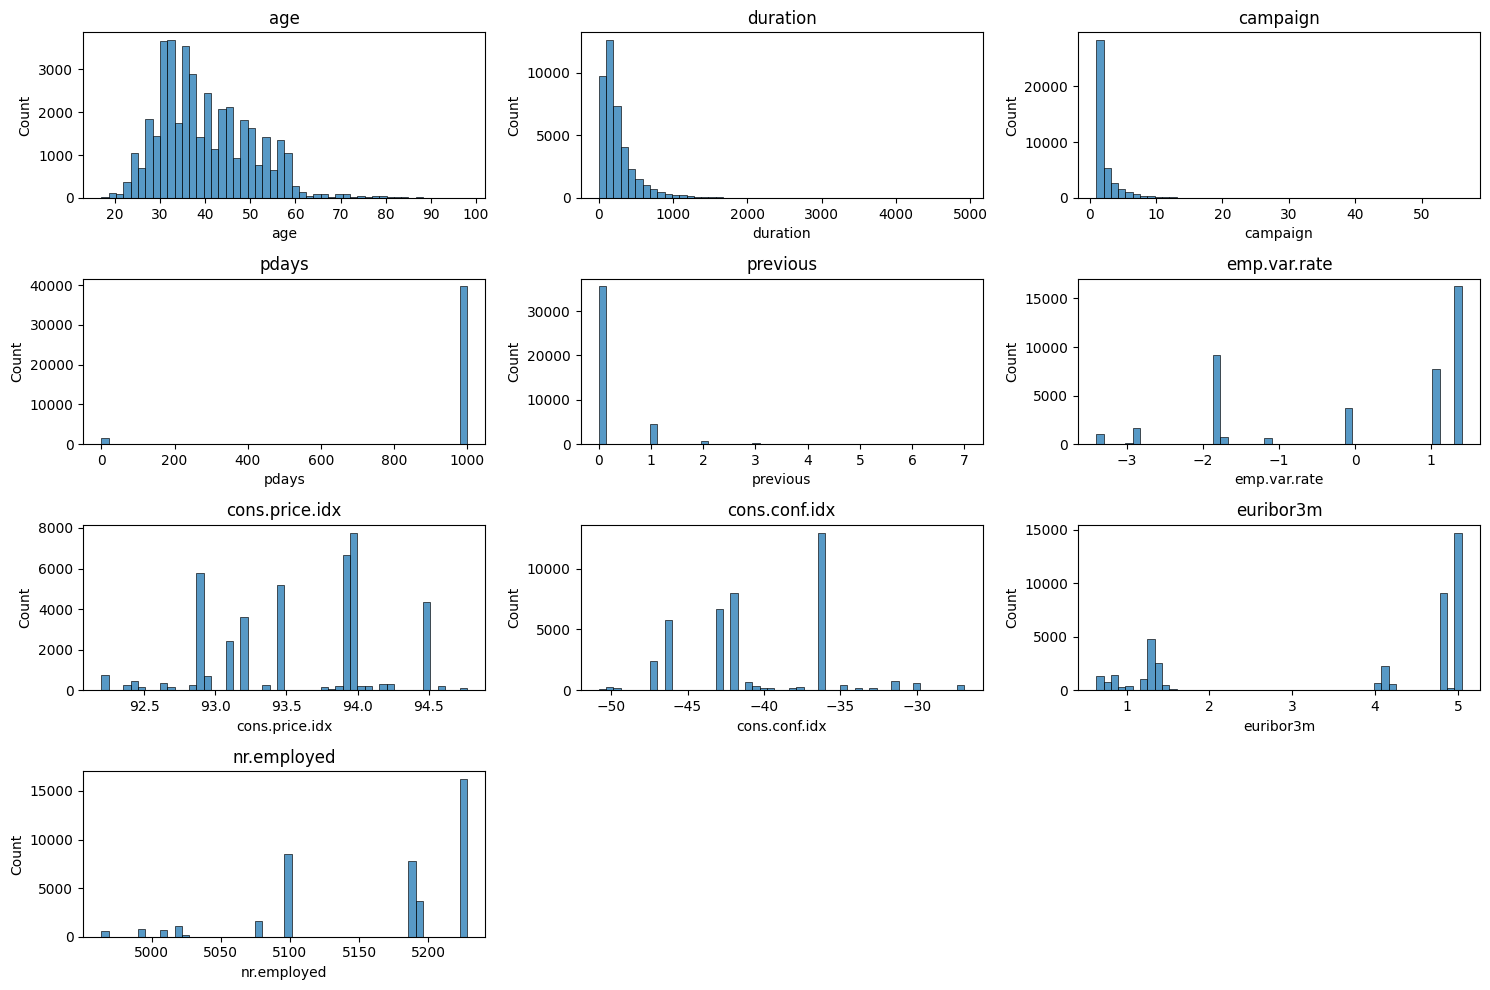

In [14]:
# Representamos las variables numéricas mediante histogramas para observar las distribución de los datos
plt.figure(figsize=(15, 10))

for i, col in enumerate(df_num.columns): 
    plt.subplot(4, 3, i+1) 
    sns.histplot(data=df_num, x=col, bins = 50) 
    plt.title(col)  

plt.tight_layout()  
plt.show()

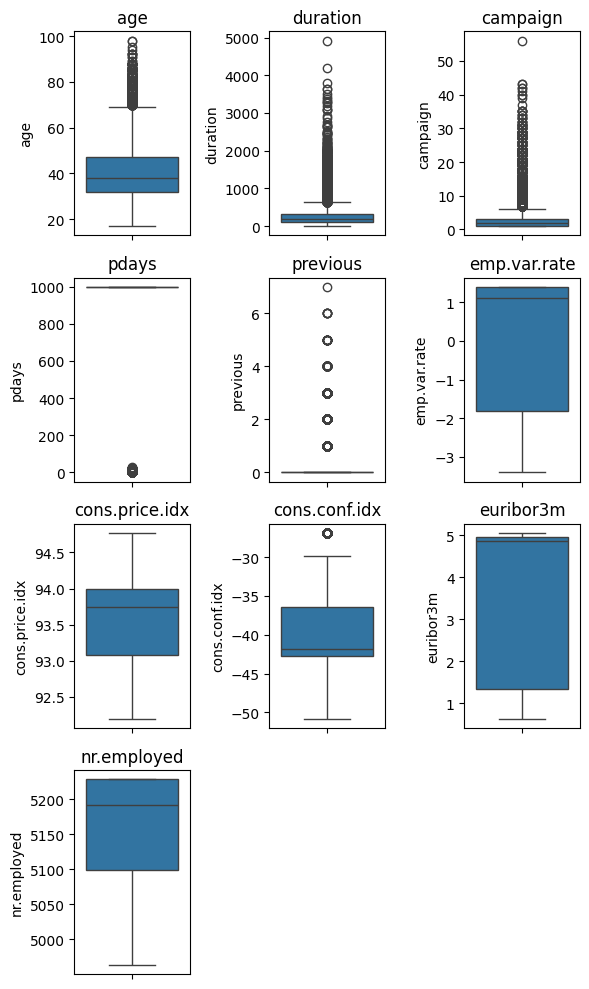

In [15]:
# Boxplots variables numéricas

plt.figure(figsize= (6, 10))

for i, col in enumerate(df_num.columns):
    plt.subplot(4, 3, i+1)  
    sns.boxplot(data=df_num[col])  
    plt.title(col)  

plt.tight_layout()  
plt.show()  

In [16]:
df_num.drop(['pdays', 'previous'], axis = 1, inplace = True)

In [17]:
df_num.apply(lambda x: x.skew())

age               0.78
duration          3.26
campaign          4.76
emp.var.rate     -0.72
cons.price.idx   -0.23
cons.conf.idx     0.30
euribor3m        -0.71
nr.employed      -1.04
dtype: float64

In [18]:
# Winsorización variables numéricas

df_num.columns

def winsorize(column, lower, upper):
    q1 = column.quantile(lower)
    q3 = column.quantile(upper)
    iqr_value = q3-q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    column = column.clip(lower=lower_bound, upper=upper_bound)
    return column

for column in df_num.columns:
    if column != 'log_price': # No winsorizamos la variable respuesta
        df_num[column] = winsorize(df_num[column], 0.25, 0.75) 

In [19]:
df_num.apply(lambda x: x.skew())

age               0.57
duration          1.04
campaign          1.21
emp.var.rate     -0.72
cons.price.idx   -0.23
cons.conf.idx     0.30
euribor3m        -0.71
nr.employed      -1.04
dtype: float64

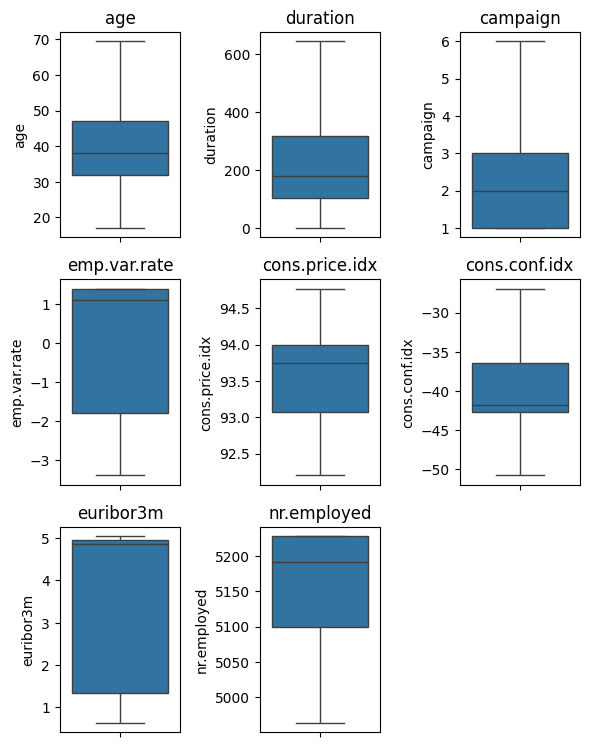

In [20]:
# Boxplots variables numéricas

plt.figure(figsize= (6, 10))

for i, col in enumerate(df_num.columns):
    plt.subplot(4, 3, i+1)  
    sns.boxplot(data=df_num[col])  
    plt.title(col)  

plt.tight_layout()  
plt.show()  

*Conclusiones variables numéricas*:
- *Variables eliminadas porque no son informativas: "pdays", "previous".*
- *"duration" y "campaign" se encuentran sesgadas, por lo que procedemos a su winsorización. En el último boxplot comprobamos que han desaparecido los outlayers.*
- *El resto de variables contienen valores aceptables y limpios.*

### Análisis univariante: variables categóricas

In [21]:
df_cat.describe().T

,count,unique,top,freq
job,41176,12,admin.,10419
marital,41176,4,married,24921
education,41176,8,university.degree,12164
default,41176,3,no,32577
housing,41176,3,yes,21571
loan,41176,3,no,33938
contact,41176,2,cellular,26135
month,41176,10,may,13767
day_of_week,41176,5,thu,8618
poutcome,41176,3,nonexistent,35551


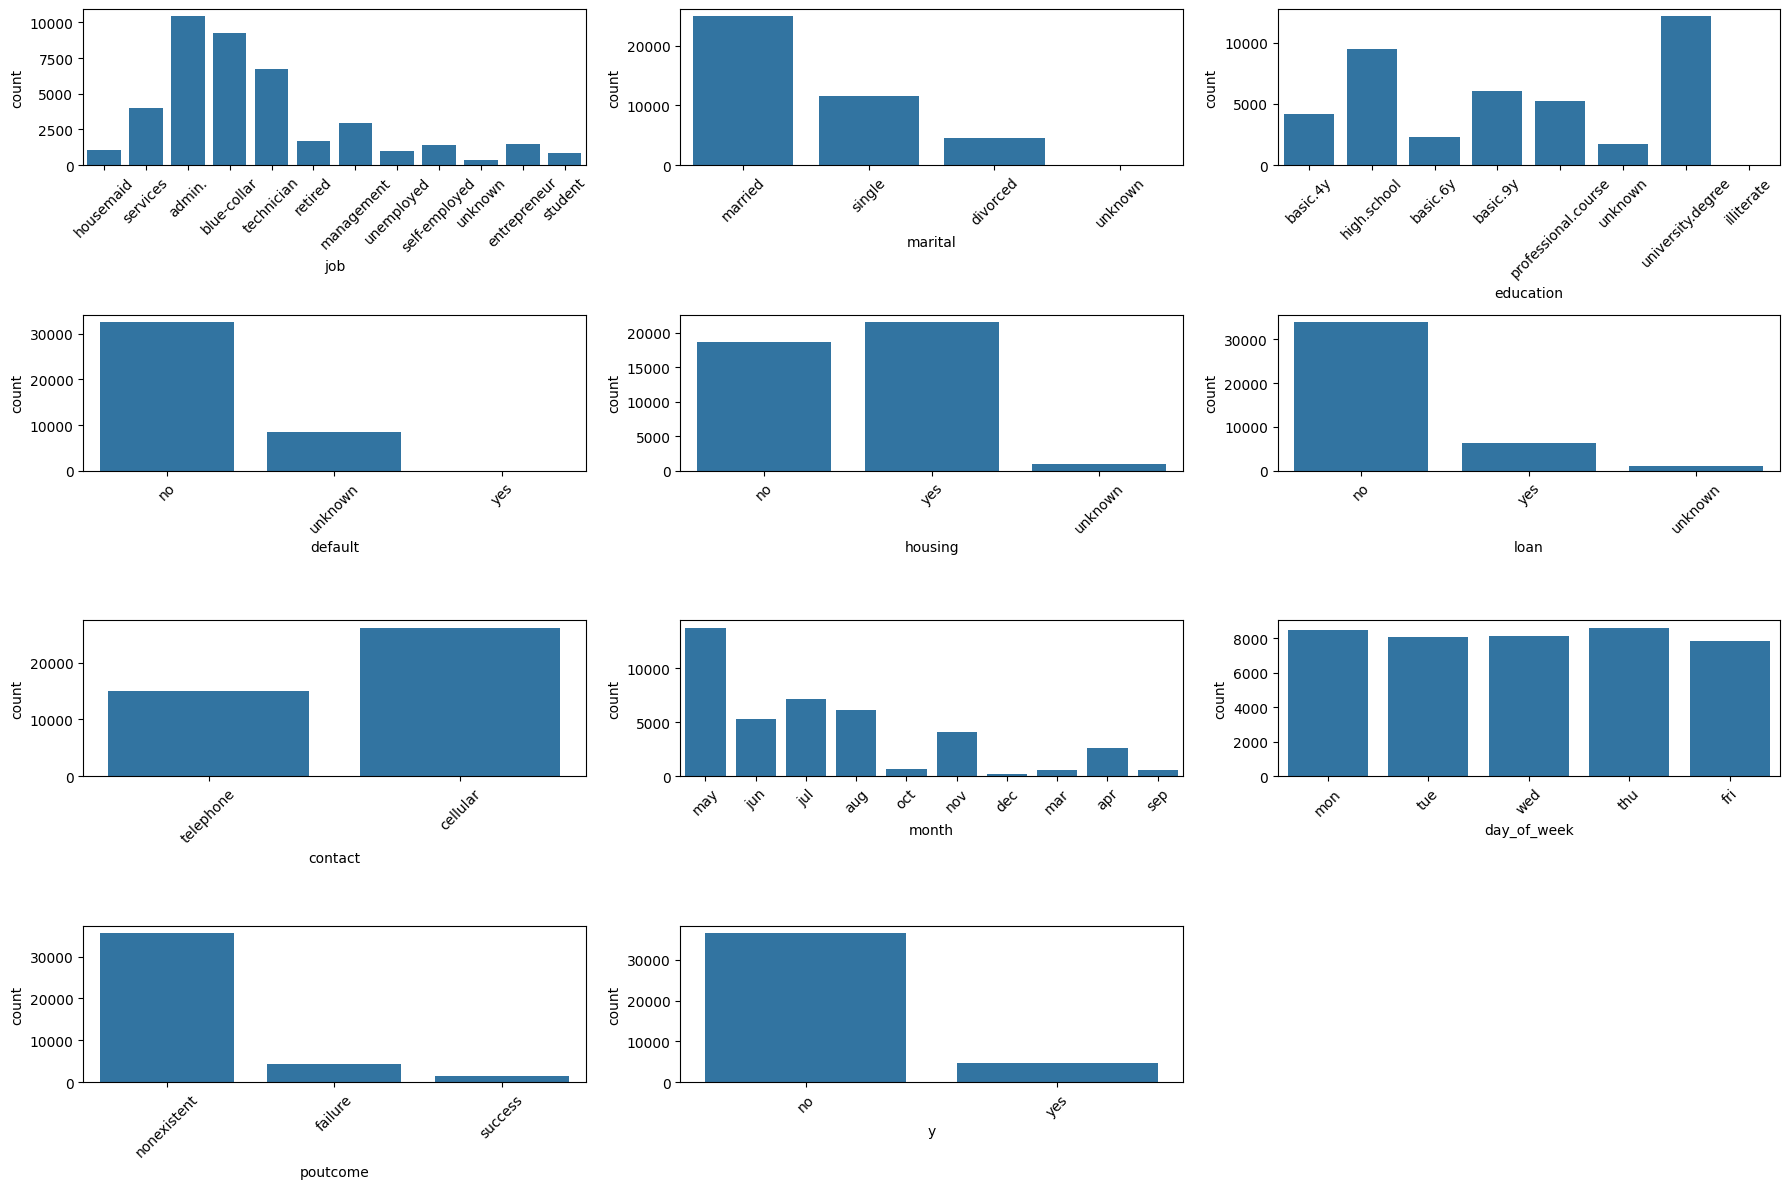

In [22]:
# Histogramas de las variables categóricas para observar su distribución

plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols, start = 1):
    plt.subplot(4, 3, i)  
    sns.countplot(data = df, x = col)
    plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()


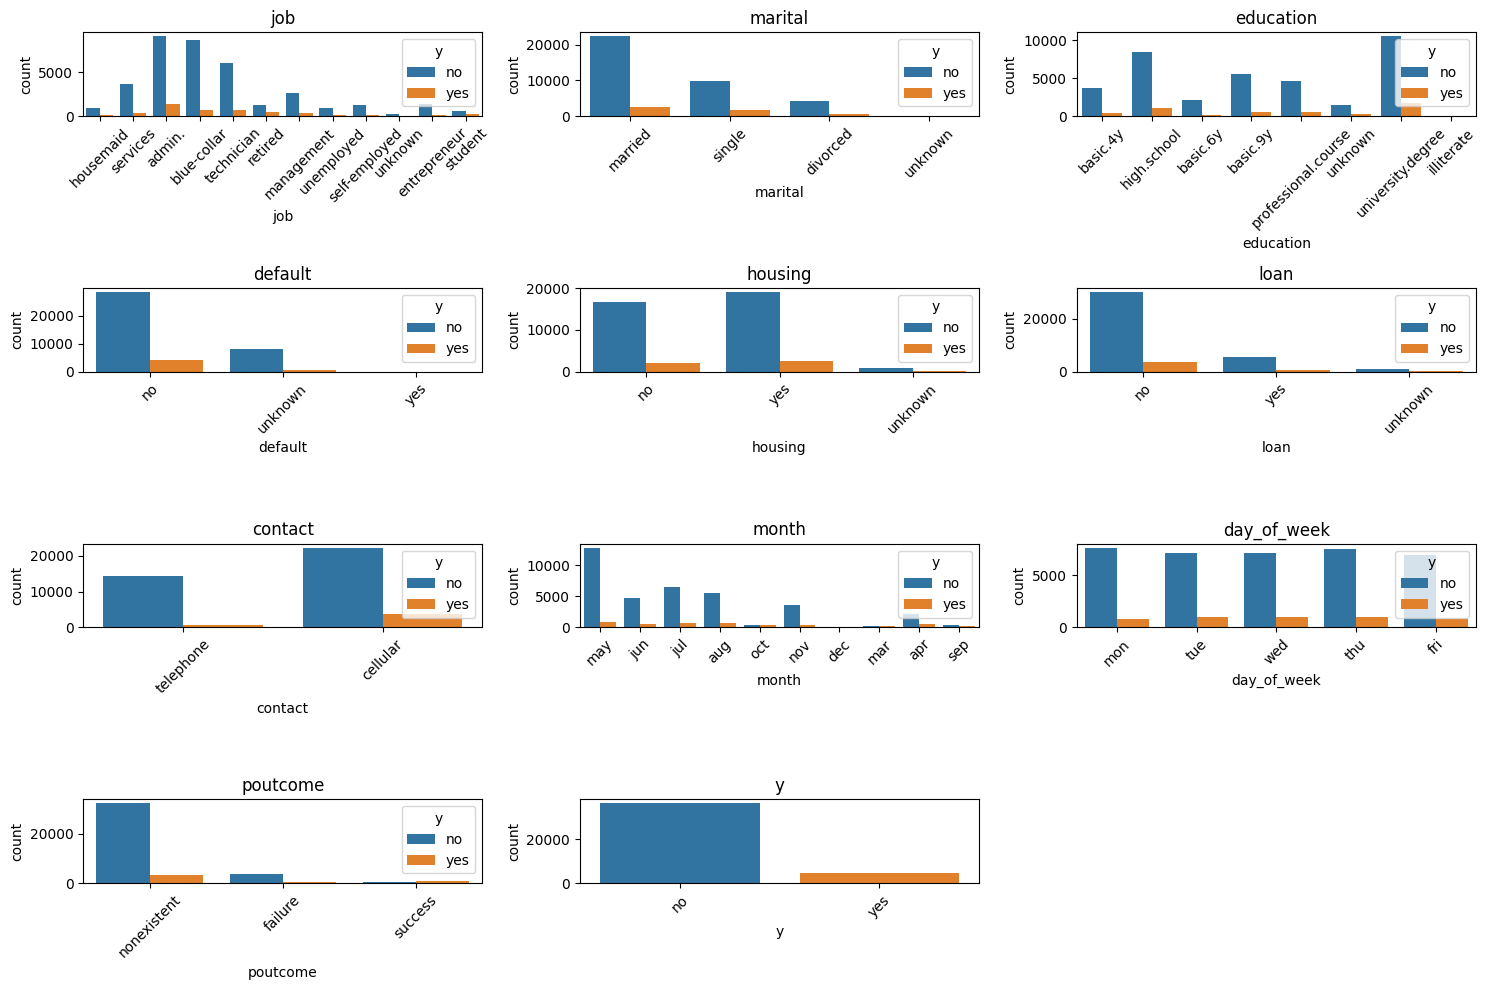

In [23]:
# Histogramas para observar la relación de la variabla respuesta con cada categoría de las variables categóricas
plt.figure(figsize=(15, 10))

for i, col in enumerate(df_cat.columns):
    plt.subplot(4, 3, i+1)
    sns.countplot(data=df_cat, x=col, hue='y')
    plt.title(col)
    plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()


- *Aunque parecía no haber valores faltantes, la realidad es que en las columnas categóricas aparecen muchos camuflados como "unknown" o "nonexistent", por lo que procedemos a su exploración.*

In [24]:
df_cat[df_cat['default'] == "yes"]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
21580,technician,married,professional.course,yes,no,no,cellular,aug,tue,nonexistent,no
21581,technician,married,professional.course,yes,yes,no,cellular,aug,tue,nonexistent,no
24866,unemployed,married,high.school,yes,no,no,cellular,nov,tue,failure,no


In [25]:
(df_cat['poutcome'] != "nonexistent").sum()

5625

In [26]:
print((df_cat['housing'] == "unknown").sum())
print((df_cat['loan'] == "unknown").sum())
print(((df["housing"] == "unknown") & (df["loan"] == "unknown")).sum())

990
990
990


*Observamos que los valores faltantes en las variables "housing" y "loan" coinciden, por lo que vamos a comprobar si resulta que ambas columnas contienen la misma información:*

In [27]:
print((df_cat['housing'] == "yes").sum())
print(((df_cat["housing"] == "yes") & (df_cat["loan"] == "yes")).sum())

21571
3691


*Los valores "yes", por ejemplo, no coinciden en ambas variables, por lo tanto contienen distinta información.*

In [28]:
print((df_cat['job'] == "unknown").sum())
print((df_cat['marital'] == "unknown").sum())
print((df_cat['education'] == "unknown").sum())

330
80
1730


*Conclusiones variables categóricas:*

- *Las variables "default" y "outcome" tienen demasiados valores faltantes, por lo que vamos a prescindir de ellas.*
- *La cantidad de valores faltantes para las variables "housing", "loan", "job", "marital" y "education" es relativamente pequeña en comparación con el número de filas del df, por lo que procederemos a imputar estos datos.*
- *Las variables "y", "contact", "loan", "housing" sólo contienen 2 categorías por lo que las transformaremos en binarias 0-1.*
- *La variable "education" contiene demasiadas categorías, por lo que las agruparemos en un número menor.*
- *Las variable "marital" tiene 3 categorías, así que realizamos la técnica de One Hot Encoding.*
- *Para las variables "month", "day_of_the_week" y "education" haremos Ordinal Encoding, ya que siguen claramente un orden ascendente.*
- *Por último, para "job" utilizaremos la codificación de frecuencia.*



### Modificación variables categóricas



In [29]:
# Eliminamos las columnas "default" y "poutcome" definitivamente

df_cat.drop(['default', 'poutcome'], axis = 1, inplace = True)

In [30]:
# Convertir los valores 'unknown' a NaN para poder imputar después

df_cat.replace('unknown', np.nan, inplace=True)  

In [31]:
# Pasar a binario para 'y', 'contact', 'loan', 'housing'

a_binarias = ['y', 'contact', 'loan', 'housing']

for col in a_binarias:
    df_cat[col] = df[col].replace({'yes': 1, 'no': 0, 'cellular': 1, 'telephone': 0})

print(df_cat[['y', 'contact', 'loan', 'housing']].head())

   y  contact loan housing
0  0        0    0       0
1  0        0    0       0
2  0        0    0       1
3  0        0    0       0
4  0        0    1       0


In [32]:
# One-hot encoding para 'marital'

df_cat_oh = pd.get_dummies(df_cat['marital'], prefix='marital')

df_cat = pd.concat([df_cat, df_cat_oh], axis=1)

df_cat.drop('marital', axis=1, inplace=True)

In [33]:
df_cat[['marital_divorced', 'marital_married', 'marital_single']] = df_cat[['marital_divorced', 'marital_married', 'marital_single']].astype(int)
df_cat.head()

,job,education,housing,loan,contact,month,day_of_week,y,marital_divorced,marital_married,marital_single
0,housemaid,basic.4y,0,0,0,may,mon,0,0,1,0
1,services,high.school,0,0,0,may,mon,0,0,1,0
2,services,high.school,1,0,0,may,mon,0,0,1,0
3,admin.,basic.6y,0,0,0,may,mon,0,0,1,0
4,services,high.school,0,1,0,may,mon,0,0,1,0


In [34]:
# Frequence encoding para 'job'

frequencies = df_cat['job'].value_counts(normalize=True)

df_cat['job_encoded'] = df_cat['job'].map(frequencies)

df_cat.drop('job', axis=1, inplace=True)


In [35]:
df_cat[['job_encoded']].head()

,job_encoded
0,0.03
1,0.10
2,0.10
3,0.26
4,0.10


In [36]:
# Agrupar las categorías de la variable "education" en solamente 3 categorías

nivel_estudios = {
    'primary': 'bajo',
    'secondary': 'bajo',
    'basic.4y': 'bajo',
    'basic.6y': 'bajo',
    'basic.9y': 'bajo',
    'high.school': 'medio',
    'professional.course': 'alto',
    'university.degree': 'universitario',
    'illiterate': 'bajo'
}
df_cat['education_level'] = df['education'].replace(nivel_estudios)

print(df_cat[['education_level']].head())



  education_level
0            bajo
1           medio
2           medio
3            bajo
4           medio


In [37]:
# Ordinal encoding para "education", "month", "day_of_the week"

order_education = {
    'bajo': 1,
    'medio': 2,
    'alto': 3,
    'universitario': 4
}

df_cat['education_encoded'] = df_cat['education_level'].map(order_education)


order_month = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

df_cat['month_encoded'] = df_cat['month'].map(order_month)

order_day_of_week = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5
}

df_cat['day_of_week_encoded'] = df_cat['day_of_week'].map(order_day_of_week)

In [38]:
df_cat.drop(['education_level'], axis = 1, inplace = True)

In [39]:
df_cat.drop(['month', 'day_of_week'], axis = 1, inplace = True)

In [40]:
df_cat.drop(['education'], axis = 1, inplace = True)

In [41]:
df_cat

,housing,loan,contact,y,marital_divorced,marital_married,marital_single,job_encoded,education_encoded,month_encoded,day_of_week_encoded
0,0,0,0,0,0,1,0,0.03,1.00,5,1
1,0,0,0,0,0,1,0,0.10,2.00,5,1
2,1,0,0,0,0,1,0,0.10,2.00,5,1
3,0,0,0,0,0,1,0,0.26,1.00,5,1
4,0,1,0,0,0,1,0,0.10,2.00,5,1
...,...,...,...,...,...,...,...,...,...,...,...
41183,1,0,1,1,0,1,0,0.04,3.00,11,5
41184,0,0,1,0,0,1,0,0.23,3.00,11,5
41185,1,0,1,0,0,1,0,0.04,4.00,11,5
41186,0,0,1,1,0,1,0,0.16,3.00,11,5


In [42]:
df_cat.replace('unknown', np.nan, inplace=True)  

In [43]:
# Imputamos los valores faltantes
imputador_knn = KNNImputer(n_neighbors=3)
df_cat[["job_encoded", "marital_single","marital_divorced", "marital_married", "education_encoded", "housing", "loan"]] = imputador_knn.fit_transform(df_cat[["job_encoded", "marital_single","marital_divorced", "marital_married", "education_encoded", "housing", "loan"]])

In [61]:
# Creamos un df nuevo con todas las variables ya modificadas
ds = pd.concat([df_num, df_cat], axis = 1)
ds

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,housing,loan,contact,y,marital_divorced,marital_married,marital_single,job_encoded,education_encoded,month_encoded,day_of_week_encoded
0,56.00,261.00,1,1.10,93.99,-36.40,4.86,5191.00,0.00,0.00,0,0,0.00,1.00,0.00,0.03,1.00,5,1
1,57.00,149.00,1,1.10,93.99,-36.40,4.86,5191.00,0.00,0.00,0,0,0.00,1.00,0.00,0.10,2.00,5,1
2,37.00,226.00,1,1.10,93.99,-36.40,4.86,5191.00,1.00,0.00,0,0,0.00,1.00,0.00,0.10,2.00,5,1
3,40.00,151.00,1,1.10,93.99,-36.40,4.86,5191.00,0.00,0.00,0,0,0.00,1.00,0.00,0.26,1.00,5,1
4,56.00,307.00,1,1.10,93.99,-36.40,4.86,5191.00,0.00,1.00,0,0,0.00,1.00,0.00,0.10,2.00,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.50,334.00,1,-1.10,94.77,-50.80,1.03,4963.60,1.00,0.00,1,1,0.00,1.00,0.00,0.04,3.00,11,5
41184,46.00,383.00,1,-1.10,94.77,-50.80,1.03,4963.60,0.00,0.00,1,0,0.00,1.00,0.00,0.23,3.00,11,5
41185,56.00,189.00,2,-1.10,94.77,-50.80,1.03,4963.60,1.00,0.00,1,0,0.00,1.00,0.00,0.04,4.00,11,5
41186,44.00,442.00,1,-1.10,94.77,-50.80,1.03,4963.60,0.00,0.00,1,1,0.00,1.00,0.00,0.16,3.00,11,5


## Análisis multivariante - Selección de características

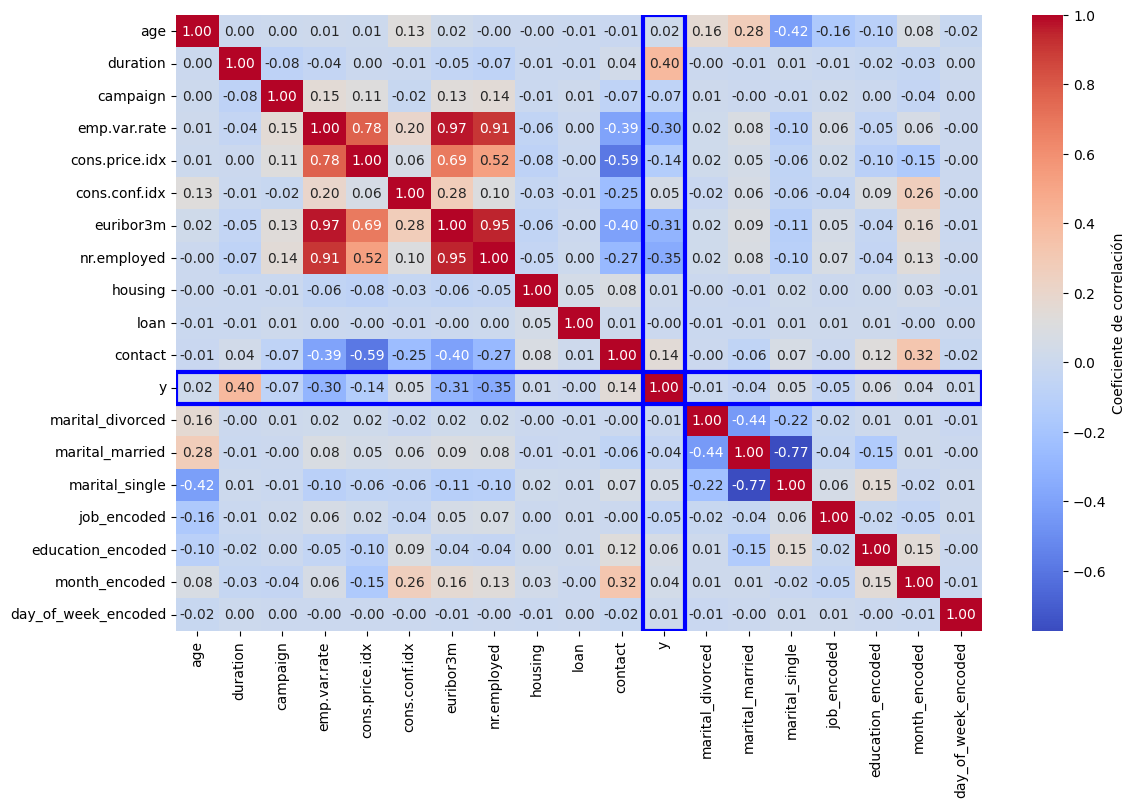

In [45]:
# Realizamos el gradiente de correlaciones
corr = ds.corr()

def corr_highlighted_target(corr, target):
   
    
    plt.figure(figsize=(13, 8))

    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Coeficiente de correlación'})

    target_index = corr.columns.tolist().index(target)

    plt.gca().add_patch(plt.Rectangle((target_index, 0), 1, len(corr), fill=False, edgecolor='blue', lw=3))
    plt.gca().add_patch(plt.Rectangle((0, target_index), len(corr), 1, fill=False, edgecolor='blue', lw=3))

    plt.show()
   


corr_highlighted_target(corr, 'y')

In [46]:
corr[corr.y.abs()>0.1].index

Index(['duration', 'emp.var.rate', 'cons.price.idx', 'euribor3m',
       'nr.employed', 'contact', 'y'],
      dtype='object')

In [47]:
high_corr = corr[corr['y'].abs() > 0.3]

for var in high_corr.index:
    correlation = high_corr.loc[var, 'y']
    print(f"{var}: {correlation}")

duration: 0.4013064954058617
euribor3m: -0.3077403955846883
nr.employed: -0.3546690153826915
y: 1.0


In [48]:
# Factor de inflación de la varianza
vif = pd.Series([variance_inflation_factor(corr.values, i) for i in range(corr.shape[1])], index=ds.columns)
vif

age                       2.62
duration                  2.41
campaign                  2.77
emp.var.rate          14438.20
cons.price.idx         1095.01
cons.conf.idx           197.82
euribor3m             41290.27
nr.employed            9936.13
housing                   1.14
loan                      1.01
contact                 133.73
y                         4.56
marital_divorced      18248.95
marital_married       66150.61
marital_single        55219.91
job_encoded               1.38
education_encoded         1.70
month_encoded            87.90
day_of_week_encoded       1.14
dtype: float64

In [49]:
# Separamos en variables predictoras y variable respuesta
X = ds.drop(['y'], axis = 1)
y = ds['y']



In [50]:
# Separamos en conjunto de entrenamiento y conjunto de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 63)

In [51]:
# Modelo XGBoost Classifier para observar la importancia de las características 

model = xgb.XGBClassifier(objective='binary:logistic')

model.fit(X_train, y_train)
feature_importances = model.feature_importances_

feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Imprime la importancia de las características (número adimensional, las características se comparan entre sí en términos de su contribución relativa a la predicción)
for feature, importance in sorted_feature_importance.items():
    print(f'Feature: {feature}, Importance: {importance}')

Feature: nr.employed, Importance: 0.6581407189369202
Feature: duration, Importance: 0.06801921874284744
Feature: cons.conf.idx, Importance: 0.04722731560468674
Feature: emp.var.rate, Importance: 0.039028096944093704
Feature: contact, Importance: 0.028853751718997955
Feature: cons.price.idx, Importance: 0.024799805134534836
Feature: euribor3m, Importance: 0.018177608028054237
Feature: day_of_week_encoded, Importance: 0.011651833541691303
Feature: month_encoded, Importance: 0.011647434905171394
Feature: education_encoded, Importance: 0.011401643045246601
Feature: loan, Importance: 0.011164756491780281
Feature: marital_single, Importance: 0.010790959931910038
Feature: campaign, Importance: 0.01078469306230545
Feature: age, Importance: 0.010555620305240154
Feature: job_encoded, Importance: 0.010436279699206352
Feature: marital_divorced, Importance: 0.009763347916305065
Feature: marital_married, Importance: 0.009247135370969772
Feature: housing, Importance: 0.00830973032861948


In [52]:
def get_vars_to_delete(d_imp, corr, imp_cut=0.005, corr_cut=0.1):
  ls_vars_low_corr = corr[corr.y.abs()<=corr_cut].index
  return [var for var in ls_vars_low_corr if d_imp[var]<=imp_cut]

In [53]:
vars_to_drop = get_vars_to_delete(sorted_feature_importance, corr, imp_cut=0.01, corr_cut=0.15)
vars_to_drop

['housing', 'marital_divorced', 'marital_married']

In [63]:
ds = ds.drop(vars_to_drop, axis=1)

In [64]:
ds

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,loan,contact,y,marital_single,job_encoded,education_encoded,month_encoded,day_of_week_encoded
0,56.00,261.00,1,1.10,93.99,-36.40,4.86,5191.00,0.00,0,0,0.00,0.03,1.00,5,1
1,57.00,149.00,1,1.10,93.99,-36.40,4.86,5191.00,0.00,0,0,0.00,0.10,2.00,5,1
2,37.00,226.00,1,1.10,93.99,-36.40,4.86,5191.00,0.00,0,0,0.00,0.10,2.00,5,1
3,40.00,151.00,1,1.10,93.99,-36.40,4.86,5191.00,0.00,0,0,0.00,0.26,1.00,5,1
4,56.00,307.00,1,1.10,93.99,-36.40,4.86,5191.00,1.00,0,0,0.00,0.10,2.00,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.50,334.00,1,-1.10,94.77,-50.80,1.03,4963.60,0.00,1,1,0.00,0.04,3.00,11,5
41184,46.00,383.00,1,-1.10,94.77,-50.80,1.03,4963.60,0.00,1,0,0.00,0.23,3.00,11,5
41185,56.00,189.00,2,-1.10,94.77,-50.80,1.03,4963.60,0.00,1,0,0.00,0.04,4.00,11,5
41186,44.00,442.00,1,-1.10,94.77,-50.80,1.03,4963.60,0.00,1,1,0.00,0.16,3.00,11,5


In [65]:
ds.drop(['month_encoded', 'emp.var.rate', 'euribor3m'], axis = 1, inplace = True)

In [67]:
#  Comprobación VIF post-eliminación variables
corr = ds.corr()
vif = pd.Series([variance_inflation_factor(corr.values, i) for i in range(corr.shape[1])], index=ds.columns)
vif

age                    2.38
duration               2.08
campaign               1.14
cons.price.idx        10.38
cons.conf.idx          1.88
nr.employed            5.85
loan                   1.00
contact                6.77
y                      3.57
marital_single         2.28
job_encoded            1.15
education_encoded      1.29
day_of_week_encoded    1.01
dtype: float64

*Conclusiones análisis multivariante:*

- *Las variables más correlacionadas con la variable respuesta son "duration" (0.40), "euribor3m" (-0.30) y "nm.employed" (-0.35). Estos resultados podrían indicar que:*

 *a) cuanto más tiempo dure la llamada, mayor es la probabilidad de que el cliente se interese en el depósito a largo plazo.*

 *b) cuando la tasa Euribor a 3 meses es más alta, es menos probable que los clientes contraten depósitos a largo plazo, posiblemente porque las tasas de interés más altas podrían hacer menos atractivos este tipo de inversiones.*
 
 *c)  cuando el número de empleados es más alto, es menos probable que los clientes contraten depósitos a largo plazo.*

- *En cuanto al modelo XGBoost, podemos observar como las variables "duration" y "nm.employed" coinciden en importancia con el análisis de correlaciones.*
- *No obstante,  se ha tomado la decisión de eliminar "euribor3m" por mantener una estrecha relación con la variable "nm.employed", así como las variables 'month_encoded', 'emp.var.rate' 'housing', 'marital_divorced', 'marital_married'por acumulación de motivos (alto VIF, baja correlación y/o baja importancia).*

- *En conclusión, conservamos 13 variables de un total de 21 con el que comenzamos el análisis.*

## Escalado de datos

In [68]:
ds

,age,duration,campaign,cons.price.idx,cons.conf.idx,nr.employed,loan,contact,y,marital_single,job_encoded,education_encoded,day_of_week_encoded
0,56.00,261.00,1,93.99,-36.40,5191.00,0.00,0,0,0.00,0.03,1.00,1
1,57.00,149.00,1,93.99,-36.40,5191.00,0.00,0,0,0.00,0.10,2.00,1
2,37.00,226.00,1,93.99,-36.40,5191.00,0.00,0,0,0.00,0.10,2.00,1
3,40.00,151.00,1,93.99,-36.40,5191.00,0.00,0,0,0.00,0.26,1.00,1
4,56.00,307.00,1,93.99,-36.40,5191.00,1.00,0,0,0.00,0.10,2.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.50,334.00,1,94.77,-50.80,4963.60,0.00,1,1,0.00,0.04,3.00,5
41184,46.00,383.00,1,94.77,-50.80,4963.60,0.00,1,0,0.00,0.23,3.00,5
41185,56.00,189.00,2,94.77,-50.80,4963.60,0.00,1,0,0.00,0.04,4.00,5
41186,44.00,442.00,1,94.77,-50.80,4963.60,0.00,1,1,0.00,0.16,3.00,5


In [69]:
X = ds.drop(['y'], axis=1)
y = ds['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 63)

In [70]:
# Seleccionamos sólo las variables continuas (excluimos aquellas que son binarias o categóricas codificadas pero que, a causa de la imputación de datos, comprenden también algunos valores tipo "float").
numeric_cols = X_train.select_dtypes(include=['float64']).columns.difference(['loan', 'marital_single', 'education_encoded', 'job_encoded'])
bin_cat_cols = X_train.columns.difference(numeric_cols) 
X_train_num = X_train[numeric_cols]
X_test_num = X_test[numeric_cols]

In [71]:
# Utilizamos MinMaxScaler
scaler = MinMaxScaler().fit(X_train_num) # Nunca ajustar con los de test!

X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler. transform(X_test_num)

In [72]:
# Unimos las variables escaladas con las binarias y categóricas codificadas
X_train_sc = pd.concat([pd.DataFrame(X_train_num_sc, columns = X_train_num.columns), X_train[bin_cat_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_num_sc, columns = X_test_num.columns), X_test[bin_cat_cols].reset_index(drop=True)], axis=1)

In [73]:
X_train_sc

,age,cons.conf.idx,cons.price.idx,duration,nr.employed,campaign,contact,day_of_week_encoded,education_encoded,job_encoded,loan,marital_single
0,0.29,0.34,0.67,0.10,1.00,6,0,1,4.00,0.07,0.00,1.00
1,0.80,0.81,0.00,0.27,0.43,1,1,3,2.00,0.04,0.33,0.00
2,0.29,0.19,0.27,0.23,0.51,2,1,2,3.00,0.16,0.00,1.00
3,0.50,0.34,0.67,0.71,1.00,6,1,1,1.00,0.23,0.00,0.00
4,0.78,0.62,0.48,0.13,1.00,5,1,1,3.00,0.04,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
32935,0.69,0.60,0.70,0.94,0.86,2,0,2,1.00,0.23,0.00,0.00
32936,0.27,0.37,0.39,0.29,0.88,1,1,3,2.00,0.10,0.00,0.00
32937,0.25,0.19,0.27,0.17,0.51,1,1,1,1.00,0.16,0.00,1.00
32938,0.63,0.38,0.88,0.09,1.00,2,0,5,1.00,0.16,0.00,0.00


## Modelización
### Sin búsqueda de hiperparámetros

In [ ]:
# Utilizamos LazyClassifier para nuestro problema de clasificación
clf = LazyClassifier()
models,predictions = clf.fit(X_train_sc, X_test_sc, y_train, y_test)

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [00:22<00:01,  1.73s/it]

[LightGBM] [Info] Number of positive: 3720, number of negative: 29220
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112933 -> initscore=-2.061130
[LightGBM] [Info] Start training from score -2.061130


100%|██████████| 29/29 [00:23<00:00,  1.23it/s]


In [ ]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.81               0.84     0.84      0.84   
GaussianNB                         0.88               0.75     0.75      0.89   
RandomForestClassifier             0.91               0.73     0.73      0.90   
LGBMClassifier                     0.90               0.73     0.73      0.90   
QuadraticDiscriminantAnalysis      0.88               0.73     0.73      0.88   
XGBClassifier                      0.90               0.72     0.72      0.90   
DecisionTreeClassifier             0.88               0.70     0.70      0.88   
ExtraTreesClassifier               0.91               0.70     0.70      0.90   
LinearDiscriminantAnalysis         0.90               0.70     0.70      0.89   
ExtraTreeClassifier                0.88               0.70     0.70      0.88   
BaggingClassifier           

In [ ]:
# Elegimos LGMClassifer: instanciamos y ajustamos el modelo a los datos de entrenamiento.
model = LGBMClassifier()
model.fit(X_train_sc, y_train)


y_pred_train = model.predict(X_train_sc)
y_pred_test = model.predict(X_test_sc)

[LightGBM] [Info] Number of positive: 3720, number of negative: 29220
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 431
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112933 -> initscore=-2.061130
[LightGBM] [Info] Start training from score -2.061130


In [ ]:
# Comparamos los resultados de "y_pred" con las "y" originales, tanto para train como para test, para ver cómo de bien está prediciendo el modelo. Para ello, utilizamos métricas interesantes para los problemas de clasificación
target_names = ['0', '1']
print(classification_report(y_train, y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     29220
           1       0.73      0.63      0.67      3720

    accuracy                           0.93     32940
   macro avg       0.84      0.80      0.82     32940
weighted avg       0.93      0.93      0.93     32940



In [ ]:
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test, target_names=target_names))

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7317
           1       0.60      0.51      0.55       919

    accuracy                           0.91      8236
   macro avg       0.77      0.73      0.75      8236
weighted avg       0.90      0.91      0.90      8236



*Dado que la variable respuesta está muy desequilibrada, nuestro modelo predice mucho mejor los casos negativos que los casos positivos, tanto en el grupo de entrenamiento como en el de test. Vamos a intentar mejorar estos valores utilizando ajuste de hiperparámetros. Por otro lado, no parece haber overfitting.*

### Con búsqueda de hiperparámetros

In [ ]:
param_dict = {'boosting_type': ['gbdt','dart'], # da error al incluir "rf"!!!
              'num_leaves': np.arange(20, 250, 30),
              'max_depth':np.arange(20, 250, 30),
              'learning_rate':np.logspace(-3,0,5),
              }

random_search = RandomizedSearchCV(model, param_distributions=param_dict, n_iter=50, cv=5, random_state=63, n_jobs=-1, scoring='f1', verbose=1)
random_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 2976, number of negative: 23376
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112933 -> initscore=-2.061130
[LightGBM] [Info] Start training from score -2.061130
[LightGBM] [Info] Number of positive: 2976, number of negative: 23376
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 431
[LightGBM] [Info] Number of data points in the train 

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'dart'],
                                        'learning_rate': array([0.001     , 0.00562341, 0.03162278, 0.17782794, 1.        ]),
                                        'max_depth': array([ 20,  50,  80, 110, 140, 170, 200, 230]),
                                        'num_leaves': array([ 20,  50,  80, 110, 140, 170, 200, 230])},
                   random_state=63, scoring='f1', verbose=1)

In [ ]:
# Mostramos los mejores hiperparámetros encontradosy el rendimeinto del mejor modelo
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Mostramos el rendimiento del mejor modelo
print("Mejor puntuación (f1) en el conjunto de prueba:")
print(random_search.best_score_) ##  Multiplicar por -1 ??

Mejores hiperparámetros encontrados:
{'num_leaves': 20, 'max_depth': 80, 'learning_rate': 0.1778279410038923, 'boosting_type': 'dart'}
Mejor puntuación (f1) en el conjunto de prueba:
0.580143997927397


In [ ]:
model = model = LGBMClassifier()

param_dict = {'boosting_type': ['dart'],
              'num_leaves': np.arange(8, 30, 5),
              'max_depth':np.arange(60, 110, 10),
              'learning_rate':[0.15, 0.17,0.2,0.23]}

# Inicializa el objeto BayesSearchCV
opt = BayesSearchCV(
    model,
    param_dict,
    n_iter=50,  # Número de iteraciones de la búsqueda
    cv=5,       # Número de divisiones en validación cruzada
    n_jobs=-1,
    random_state=42,
    scoring='f1',  # Métrica a optimizar
    verbose=2
)

# Realiza la búsqueda bayesiana
opt.fit(X_train_sc, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Number of positive: 2976, number of negative: 23376
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 431
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112933 -> initscore=-2.061130
[LightGBM] [Info] Start training from score -2.061130
[LightGBM] [Info] Number of positive: 2976, number of negative: 23376
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set

BayesSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1, random_state=42,
              scoring='f1',
              search_spaces={'boosting_type': ['dart'],
                             'learning_rate': [0.15, 0.17, 0.2, 0.23],
                             'max_depth': array([ 60,  70,  80,  90, 100]),
                             'num_leaves': array([ 8, 13, 18, 23, 28])},
              verbose=2)

In [ ]:
# Imprime los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(opt.best_params_)

# Mostramos el rendimiento del mejor modelo
print("Mejor puntuación (f1) en el conjunto de prueba:")
print(opt.best_score_)

Mejores hiperparámetros encontrados:
OrderedDict([('boosting_type', 'dart'), ('learning_rate', 0.15), ('max_depth', 100), ('num_leaves', 18)])
Mejor puntuación (f1) en el conjunto de prueba:
0.583972538025478


In [ ]:
model = opt.best_estimator_

y_pred_train = model.predict(X_train_sc)
y_pred_test = model.predict(X_test_sc)

In [ ]:
target_names = ['0', '1']
print("Classification Report for Train Data:")
print(classification_report(y_train, y_pred_train, target_names=target_names))


Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     29220
           1       0.66      0.57      0.61      3720

    accuracy                           0.92     32940
   macro avg       0.80      0.76      0.78     32940
weighted avg       0.91      0.92      0.92     32940



In [ ]:
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test, target_names=target_names))

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7317
           1       0.60      0.51      0.55       919

    accuracy                           0.91      8236
   macro avg       0.77      0.74      0.75      8236
weighted avg       0.90      0.91      0.90      8236



*Consideraciones a tener en cuenta:*

*1. Al incluir "rf" como posibilidad en "boosting_type" da error. Después de una búsqueda por internet, expertos proponen no incluirlo, pero no entiendo por qué.*
*2. Los resultados para las mejores puntuaciones obtenidas, tanto pra RandomSearch como para Bayes me sale negativo al multiplicarlo por -1. ¿Se debe multiplicarlo siempre? ¿Con qué finalidad?*

*Conclusiones búsqueda hiperparámetros*:

*Apenas ha mejorado la puntuación utilizando búsqueda de hiperparámetros.*
*Vamos a intentar adjudicar pesos a cada clase de la variable respuesta para intentar mejorar el equilibrio.*

In [ ]:

# Calcula los pesos de clase
# Supongamos que tienes dos clases: 0 y 1
# Calcula los pesos de clase inversamente proporcionales a la frecuencia de cada clase
class_weights = {0: len(y_train) / (2 * np.count_nonzero(y_train == 0)),
                 1: len(y_train) / (2 * np.count_nonzero(y_train == 1))}

# Instancia el clasificador con los pesos de clase
model = LGBMClassifier(class_weight=class_weights)

# Ajusta el clasificador a tus datos de entrenamiento
model.fit(X_train_sc, y_train)

# Hacer predicciones en tus datos de entrenamiento y de prueba
y_pred_train = model.predict(X_train_sc)
y_pred_test = model.predict(X_test_sc)


[LightGBM] [Info] Number of positive: 3720, number of negative: 29220
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 431
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


In [ ]:
target_names = ['0', '1']
print("Classification Report for Train Data:")
print(classification_report(y_train, y_pred_train, target_names=target_names))


Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     29220
           1       0.49      0.97      0.65      3720

    accuracy                           0.88     32940
   macro avg       0.74      0.92      0.79     32940
weighted avg       0.94      0.88      0.90     32940



In [ ]:
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test, target_names=target_names))

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7317
           1       0.45      0.90      0.60       919

    accuracy                           0.87      8236
   macro avg       0.72      0.88      0.76      8236
weighted avg       0.93      0.87      0.88      8236



*Conclusicones ajuste de pesos:*

- *Este ajuste parece haber mejorado la capacidad del modelo para identificar casos positivos (clase 1), pero al costo de una disminución en la precisión y el recall de la clase 0.*

- *Esto útil si la detección de casos positivos es crítica y la penalización por clasificar erróneamente ejemplos negativos como positivos es baja en comparación con la importancia de identificar correctamente casos positivos.*

- *Dado que el objetivo principal del modelo es encontrar clientes con altas probabilidades de contratar un depósito a largo plazo, en mi opinión es más importante detectar con precisión al máximo porcentaje de estos clientes potenciales, a pesar de que quepa la posibilidad de que se hayan clasificado a algunos de estos clientes como potenciales cuando no lo son.*
- *Por lo tanto, nos quedamos con este modelo con ajuste de pesos.*


In [122]:
def custom_transform(X):
  X_num = X.iloc[:, [0,1,2,3,4]]
  X_num_sc = scaler.transform(X_num)
  X_sc = pd.concat([pd.DataFrame(X_num_sc), X.iloc[:, [0,1,2,3,4]].reset_index(drop=True)], axis=1, ignore_index=True)
  return X_sc

# Define los pasos del pipeline
steps = [
    ('custom_transform', FunctionTransformer(func=custom_transform)),  # Paso con función personalizada
    ('modelo', model)  # Paso del modelo de regresión
]

# Crea el pipeline
pipeline = Pipeline(steps)

In [123]:
joblib.dump(pipeline, 'model_pipeline.pkl')

['model_pipeline.pkl']

In [124]:
loaded_pipeline = joblib.load('model_pipeline.pkl')

In [125]:
cols = ['age', 'cons.conf.idx', 'cons.price.idx', 'duration', 'nr.employed',
       'campaign', 'contact', 'day_of_week_encoded', 'education_encoded',
       'job_encoded', 'loan', 'marital_single']

In [132]:
new_client_data = pd.DataFrame([[30, 0.5, 0.3, 20, 100, 3, 1, 2, 4, 0.25, 1, 0]], columns = cols)


   age  cons.conf.idx  cons.price.idx  duration  nr.employed  campaign  \
0   30           0.50            0.30        20          100         3   

   contact  day_of_week_encoded  education_encoded  job_encoded  loan  \
0        1                    2                  4         0.25     1   

   marital_single  
0               0  
       age  cons.conf.idx  cons.price.idx  duration  nr.employed  campaign  \
0     0.29           0.34            0.67      0.10         1.00         6   
1     0.80           0.81            0.00      0.27         0.43         1   
2     0.29           0.19            0.27      0.23         0.51         2   
3     0.50           0.34            0.67      0.71         1.00         6   
4     0.78           0.62            0.48      0.13         1.00         5   
...    ...            ...             ...       ...          ...       ...   
32935 0.69           0.60            0.70      0.94         0.86         2   
32936 0.27           0.37            0.3

In [ ]:
prediction = loaded_pipeline.predict(new_client_data)[0]

print(f'Predicción depósito a largo plazo: {prediction}')

In [ ]:
print(new_client_data)
print(X_train_sc)

*Comentarios para el corrector:*

*No consigo que me funcione, no sé cómo solucionarlo. Me da un error diciendo que no le estoy pasando los mismos nombres de columnas que los que tiene el modelo. El modelo está entrenado con X_train_sc y contiene las mismas columnas que new_client_data. Podríais ayudarme? Seguro que es una tontería pero no consigo verlo. Gracias.*